# SÁL242F Exercise 1: Introduction to Python for Data Analysis

## Purpose of the exercise

This first programming exercise introduces Python through a real, large-scale dataset. The goal is not advanced statistics, but to learn how to load, inspect, clean, summarize, and visualize data in a reproducible way.

By the end of the exercise, students should be able to:

* work comfortably in a Jupyter notebook
* load and inspect a real dataset using pandas
* perform basic data cleaning and feature construction
* answer simple research questions using groupby and aggregation
* create clear, minimal plots with matplotlib
* describe results in plain language

This exercise must be completed in Python.

## Data Source

The data in `data/openalex_works.csv` is an export from OpenAlex (https://openalex.org), containing records of works (articles) filtered at export time with the following criteria:

- Year: 2000–2025
- Field: Psychology
- Type: article
- Source type: journal
- Countries: Iceland, Sweden, Norway, Denmark, Finland, Greenland, Faroe Islands

About OpenAlex:

OpenAlex is an open, free index of scholarly metadata (works, authors, institutions, journals, and concepts) provided by OurResearch. It aggregates bibliographic and citation metadata from many sources and makes it available via a web UI and an API. OpenAlex data and metadata are published under an open public-domain-like license (see https://openalex.org for current licensing and API details).

This CSV was saved locally as `data/openalex_works.csv` and is used throughout this notebook for analysis and plotting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Loading the data
import pandas as pd
fp = 'data/openalex_works.csv' # Change this to the actual path
df = pd.read_csv(fp, low_memory=False)
print('Loaded:', df.shape)
df.head()

Loaded: (66072, 29)


,id,abstract,authorships.author.display_name,authorships.author.id,authorships.author.orcid,authorships.countries,authorships.institutions.display_name,authorships.institutions.id,authorships.is_corresponding,best_oa_location.license,...,open_access.is_oa,open_access.oa_status,primary_location.source.display_name,primary_location.source.id,primary_location.source.issn_l,primary_location.source.type,primary_topic.display_name,publication_date,publication_year,type
0,https://openalex.org/W2120575493,NaN,Ruth Gilbert|Cathy Spatz Widom|Kevin D. Browne...,https://openalex.org/A5005303580|https://opena...,https://orcid.org/0000-0001-9347-2709|https://...,GB|US|GB|NZ|GB|SE,Royal College of Paediatrics and Child Health|...,https://openalex.org/I55571929|https://openale...,False|False|False|False|False|False,NaN,...,False,closed,The Lancet,https://openalex.org/S49861241,0140-6736,journal,Child Abuse and Trauma,2008-12-05,2008,article
1,https://openalex.org/W2161411308,The differences across cultures in the enforce...,Michele J. Gelfand|Jana L. Raver|Lisa H. Nishi...,https://openalex.org/A5070913945|https://opena...,https://orcid.org/0000-0002-9780-9230|https://...,US|CA|US|US|US|SG|US||SG||TR|DE|PL|PT|HK|IN|PE...,"University of Maryland, College Park|Queen's U...",https://openalex.org/I66946132|https://openale...,True|False|False|False|False|False|False|False...,other-oa,...,True,green,Science,https://openalex.org/S3880285,0036-8075,journal,Cultural Differences and Values,2011-05-26,2011,article
2,https://openalex.org/W2342137125,NaN,Edward L. Deci|Anja H. Olafsen|Richard M. Ryan,https://openalex.org/A5004154542|https://opena...,https://orcid.org/0000-0001-8246-8536|https://...,AU|NO|US|NO|AU|US,Australian Catholic University|University of S...,https://openalex.org/I86695891|https://openale...,False|False|False,NaN,...,False,closed,Annual Review of Organizational Psychology and...,https://openalex.org/S4210200923,2327-0608,journal,Motivation and Self-Concept in Sports,2017-01-26,2017,article
3,https://openalex.org/W2037445719,The aim of the present study was to focus on t...,Nadia Garnefski|V. Kraaij|Maya J. Schroevers|G...,https://openalex.org/A5077610649|https://opena...,https://orcid.org/0000-0003-1198-0502||https:/...,NL|NL|NL|DK,Leiden University|Leiden University Medical Ce...,https://openalex.org/I121797337|https://openal...,True|False|False|False,cc-by-nc,...,True,hybrid,Journal of Clinical Psychology in Medical Sett...,https://openalex.org/S66816338,1068-9583,journal,Posttraumatic Stress Disorder Research,2008-12-01,2008,article
4,https://openalex.org/W2060451083,Several previous studies have suggested that b...,Philip H. K. Seymour|Mikko Aro|Jane Erskine,https://openalex.org/A5060417452|https://opena...,|https://orcid.org/0000-0002-0545-0591|,GB|FI|FI|GB,University of Dundee|University of Jyväskylä|U...,https://openalex.org/I177639307|https://openal...,False|False|False,NaN,...,True,bronze,British Journal of Psychology,https://openalex.org/S179213746,0007-1269,journal,Reading and Literacy Development,2003-05-01,2003,article


In [7]:
# Analysis cell 2: basic exploration
print('Columns:', df.columns.tolist())

print('\nMissing (top 20):')
display(df.isna().sum().sort_values(ascending=False).head(20))

print('\nPublication year counts:')
display(df['publication_year'].value_counts().sort_index())

print('\nTop journals:')
display(df['primary_location.source.display_name'].value_counts().head(20))

print('\nOA status counts:')
display(df['open_access.oa_status'].value_counts(dropna=False))

NameError: name 'df' is not defined

In [24]:
# Analysis cell 3: compute summaries (year_counts, top_journals, top_authors, top_cited, oa_counts)
from collections import Counter
import pandas as pd

# Top authors by appearances (split pipe-separated author names)
if 'authorships.author.display_name' in df.columns:
    s = df['authorships.author.display_name'].dropna().astype(str).str.split('|')
    C = Counter()
    for row in s:
        C.update([a.strip() for a in row if a and a.strip()])
    top_authors = pd.DataFrame(C.most_common(200), columns=['author','count'])
else:
    top_authors = pd.DataFrame(columns=['author','count'])

# Top journals
if 'primary_location.source.display_name' in df.columns:
    top_journals = df['primary_location.source.display_name'].fillna('UNKNOWN').value_counts().reset_index()
    top_journals.columns = ['journal','count']
else:
    top_journals = pd.DataFrame(columns=['journal','count'])

# Top cited works
if 'cited_by_count' in df.columns:
    top_cited = df.sort_values('cited_by_count', ascending=False).head(200)[['display_name','id','cited_by_count','doi','publication_year','primary_location.source.display_name']]
else:
    top_cited = pd.DataFrame(columns=['display_name','id','cited_by_count','doi','publication_year','primary_location.source.display_name'])

# Publications per year
if 'publication_year' in df.columns:
    year_counts = df['publication_year'].dropna().astype(int).value_counts().sort_index().reset_index()
    year_counts.columns = ['year','count']
else:
    year_counts = pd.DataFrame(columns=['year','count'])

# Open-access status counts
if 'open_access.oa_status' in df.columns:
    oa_counts = df['open_access.oa_status'].fillna('unknown').value_counts().reset_index()
    oa_counts.columns = ['oa_status','count']
else:
    oa_counts = pd.DataFrame(columns=['oa_status','count'])

# Display small previews
print('Top authors (top 10):')
print(top_authors.head(10).to_string(index=False))
print('\nTop journals (top 10):')
print(top_journals.head(10).to_string(index=False))
print('\nYear counts (sample):')
print(year_counts.head(10).to_string(index=False))
print('\nOA counts:')
print(oa_counts.to_string(index=False))


Top authors (top 10):
            author  count
 Gerhard Andersson    463
    Ståle Pallesen    293
     Per Carlbring    274
  Cynthia M. Bulik    264
 Paul Lichtenstein    257
        Ask Elklit    221
 Merete Nordentoft    213
 David Mataix‐Cols    202
Torbjörn Åkerstedt    195
    Bjørn Bjorvatn    182

Top journals (top 10):
                                                          journal  count
                                          Frontiers in Psychology   1101
                                                         PLoS ONE    771
                                European Journal of Public Health    673
                                     Nordic Journal of Psychiatry    644
                                              European Psychiatry    572
                               Scandinavian Journal of Psychology    486
                                                   BMC Psychiatry    476
International Journal of Environmental Research and Public Health    456
           

In [3]:
# Analysis cell 4: plots (year distribution, top journals, OA status) using matplotlib (display only)
import matplotlib.pyplot as plt

# Publications per year
plt.figure(figsize=(10,4))
plt.bar(year_counts['year'].astype(str), year_counts['count'], color='C0')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Publications per year')
plt.tight_layout()
plt.show()

# Top 20 journals (horizontal bar)
plt.figure(figsize=(8,6))
top20 = top_journals.head(20).iloc[::-1]
plt.barh(top20['journal'], top20['count'], color='C1')
plt.xlabel('Count')
plt.title('Top 20 journals')
plt.tight_layout()
plt.show()

# Open-access status
plt.figure(figsize=(6,4))
plt.bar(oa_counts['oa_status'].astype(str), oa_counts['count'], color='C2')
plt.xticks(rotation=45)
plt.xlabel('OA status')
plt.ylabel('Count')
plt.title('Open access status')
plt.tight_layout()
plt.show()


NameError: name 'year_counts' is not defined

<Figure size 1000x400 with 0 Axes>

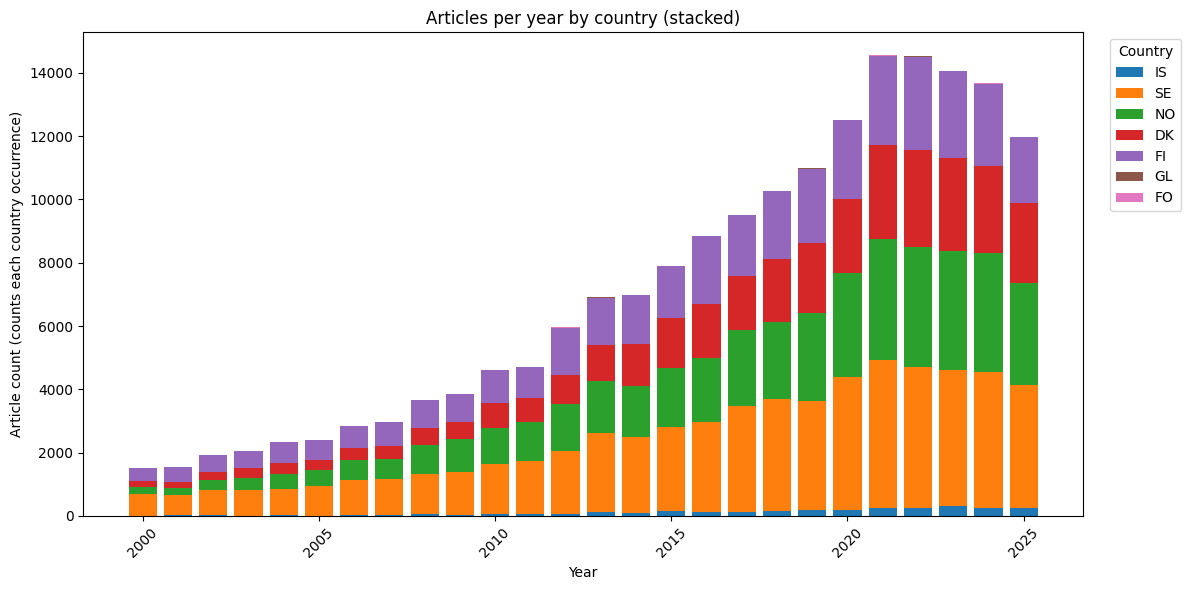

In [26]:
# Country plot 1: Stacked articles per year by country

# Countries of interest (ISO codes)
countries = ['IS','SE','NO','DK','FI','GL','FO']

# Prepare country-year counts
df_c = df[['publication_year','authorships.countries']].dropna()
df_c = df_c.assign(countries=df_c['authorships.countries'].astype(str).str.split('|'))
df_c = df_c.explode('countries')
df_c['countries'] = df_c['countries'].str.strip()

df_c = df_c[df_c['publication_year'].notna()]
df_c['publication_year'] = df_c['publication_year'].astype(int)

pivot = df_c.groupby(['publication_year','countries']).size().unstack(fill_value=0)
# Keep only the selected countries (add missing as zeros)
pivot = pivot.reindex(columns=countries, fill_value=0)
pivot = pivot.sort_index()

# Plot stacked bar
fig, ax = plt.subplots(figsize=(12,6))
bottom = None
colors = plt.cm.tab10.colors
for i,c in enumerate(countries):
    vals = pivot[c].values
    if bottom is None:
        ax.bar(pivot.index, vals, label=c, color=colors[i % len(colors)])
        bottom = vals
    else:
        ax.bar(pivot.index, vals, bottom=bottom, label=c, color=colors[i % len(colors)])
        bottom = bottom + vals

ax.set_xlabel('Year')
ax.set_ylabel('Article count (counts each country occurrence)')
ax.set_title('Articles per year by country (stacked)')
ax.legend(title='Country', bbox_to_anchor=(1.02,1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
# Topic plot 1: Top topics (bar chart)
import matplotlib.pyplot as plt

if 'primary_topic.display_name' in df.columns:
    topics = df['primary_topic.display_name'].fillna('Unknown')
    topic_counts = topics.value_counts().reset_index()
    topic_counts.columns = ['topic','count']
    top_topics = topic_counts.head(20).iloc[::-1]
    plt.figure(figsize=(8,6))
    plt.barh(top_topics['topic'], top_topics['count'], color='C4')
    plt.xlabel('Count')
    plt.title('Top 20 primary topics')
    plt.tight_layout()
    plt.show()
else:
    print('No `primary_topic.display_name` column found in dataframe.')

NameError: name 'df' is not defined

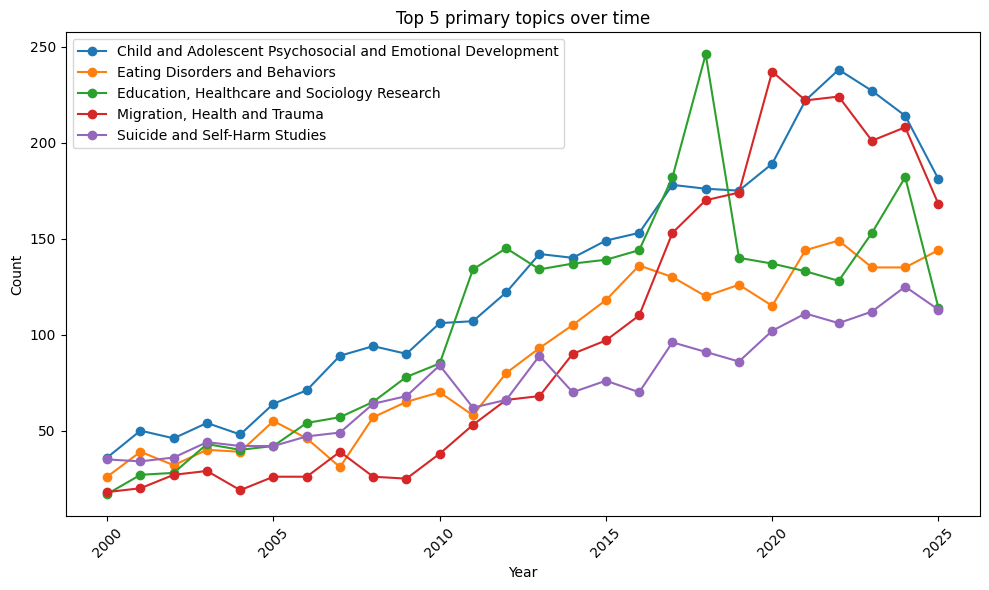

In [28]:
# Topic plot 2: Top topics over time (lines for top 5 topics)
import matplotlib.pyplot as plt

if 'primary_topic.display_name' in df.columns and 'publication_year' in df.columns:
    df_t = df[['publication_year','primary_topic.display_name']].dropna()
    df_t['publication_year'] = df_t['publication_year'].astype(int)
    df_t['primary_topic.display_name'] = df_t['primary_topic.display_name'].fillna('Unknown')
    top5 = df_t['primary_topic.display_name'].value_counts().head(5).index.tolist()
    df_top5 = df_t[df_t['primary_topic.display_name'].isin(top5)]
    pivot_t = df_top5.groupby(['publication_year','primary_topic.display_name']).size().unstack(fill_value=0).sort_index()
    plt.figure(figsize=(10,6))
    for col in pivot_t.columns:
        plt.plot(pivot_t.index, pivot_t[col], marker='o', label=col)
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Top 5 primary topics over time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print('Required columns for topic time series not found.')

In [5]:
# Debug: inspect country labels and counts to find Iceland entries
import pandas as pd

# Rebuild exploded country column for inspection
df_c_debug = df[['publication_year','authorships.countries']].dropna().assign(countries=lambda x: x['authorships.countries'].astype(str).str.split('|')).explode('countries')
df_c_debug['countries'] = df_c_debug['countries'].str.strip()

vc = df_c_debug['countries'].value_counts()
print('Total distinct country labels:', len(vc))
print('\nTop 50 country labels:')
print(vc.head(50).to_string())

# Show any labels that mention Iceland (case-insensitive) or IS/ISL
mask = vc.index.to_series().str.contains('ice|iceland|^IS$|\bISL\b', case=False, regex=True)
print('\nLabels matching Iceland patterns:')
print(vc[mask].to_string() if mask.any() else 'None found')

# Exact counts for 'IS' if present
print('\nCount for exact "IS":', int(vc.get('IS', 0)))

NameError: name 'df' is not defined

Total Iceland country-occurrences in dataset (normalized as IS): 3020
Sample Iceland counts by year (last 5 years):
publication_year
2021    268
2022    256
2023    300
2024    251
2025    249

Iceland per-100k article rates (last 5 years):
publication_year
2021    71.942446
2022    67.015181
2023    77.788121
2024    64.940777
2025    64.423321


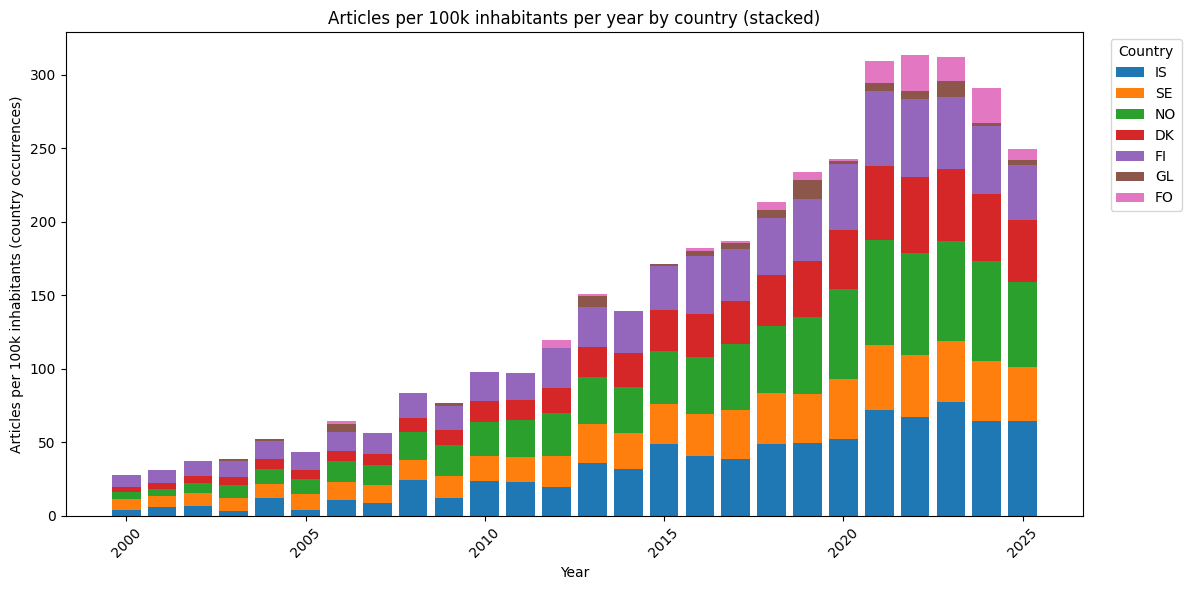

In [30]:
# Country plot 3: Stacked articles per 100k inhabitants per year (normalized country codes and Iceland verification)
# Fetch population from World Bank where available; fallback for Greenland/Faroe
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Map ISO2 to World Bank ISO3 where available
wb_map = {
    'IS': 'ISL',
    'SE': 'SWE',
    'NO': 'NOR',
    'DK': 'DNK',
    'FI': 'FIN',
    'GL': None,  # Greenland not in WB as independent country
    'FO': None,  # Faroe Islands not in WB as independent country
}

years = list(range(2000, 2026))
pop_df = pd.DataFrame(index=years)

for iso2, iso3 in wb_map.items():
    if iso3:
        url = f'https://api.worldbank.org/v2/country/{iso3}/indicator/SP.POP.TOTL?format=json&date=2000:2025&per_page=1000'
        try:
            r = requests.get(url, timeout=10)
            data = r.json()
            records = data[1]
            vals = {int(rec['date']): rec['value'] for rec in records if rec.get('value') is not None}
            pop_series = pd.Series(vals)
            pop_df[iso2] = pop_series.reindex(years)
        except Exception:
            pop_df[iso2] = np.nan
    else:
        pop_df[iso2] = np.nan

# Fallback estimates for Greenland and Faroe Islands
fallback = {'GL': 56000, 'FO': 54000}
for iso2 in ['GL','FO']:
    if pop_df[iso2].isna().all():
        pop_df[iso2] = pd.Series({y: fallback[iso2] for y in years})

pop_df = pop_df.sort_index().ffill().bfill()

# Rebuild exploded country column and normalize labels
df_c = df[['publication_year','authorships.countries']].dropna().assign(countries=lambda x: x['authorships.countries'].astype(str).str.split('|')).explode('countries')
df_c['countries'] = df_c['countries'].str.strip()

# Normalization function: map various Iceland labels to 'IS', keep 2-letter codes uppercase
import re

def normalize_label(s):
    s0 = str(s).strip()
    if not s0:
        return s0
    su = s0.upper()
    # common full-name matches for Iceland
    if re.search(r'ICE|ICELAND|ÍSLAND', su):
        return 'IS'
    # map ISO-like values of length 2 (e.g., SE, NO)
    if len(su) == 2 and su.isalpha():
        return su
    # map some ISO3 to ISO2 if present
    iso3_to_iso2 = {'ISL':'IS'}
    if su in iso3_to_iso2:
        return iso3_to_iso2[su]
    # default: return uppercase short token (first token)
    token = su.split()[0]
    return token

# Apply normalization
df_c['country_code'] = df_c['countries'].apply(normalize_label)

# Aggregate counts by normalized code
pivot = df_c.groupby(['publication_year','country_code']).size().unstack(fill_value=0)

# Countries of interest (final codes)
countries = ['IS','SE','NO','DK','FI','GL','FO']
pc = pivot.reindex(columns=countries, fill_value=0).sort_index()

# Verify Iceland presence
is_count = pc['IS'].sum() if 'IS' in pc.columns else 0
print('Total Iceland country-occurrences in dataset (normalized as IS):', int(is_count))
print('Sample Iceland counts by year (last 5 years):')
print(pc['IS'].tail(5).to_string() if 'IS' in pc.columns else 'IS not present')

# Build per-capita rates per 100k inhabitants
rate = pd.DataFrame(index=pc.index)
for c in countries:
    pop_for_years = pop_df.get(c)
    if pop_for_years is None:
        pop_for_years = pd.Series({y: fallback.get(c, np.nan) for y in years})
    pop_for_years = pop_for_years.reindex(pc.index).astype(float)
    rate[c] = pc[c] / (pop_for_years / 100000)

rate = rate.replace([np.inf, -np.inf], np.nan).fillna(0)

# Verify per-100k for Iceland (recent years)
print('\nIceland per-100k article rates (last 5 years):')
if 'IS' in rate.columns:
    print(rate['IS'].tail(5).to_string())
else:
    print('IS column missing in rate dataframe')

# Plot stacked bar of per-100k rates
fig, ax = plt.subplots(figsize=(12,6))
bottom = np.zeros(len(rate))
colors = plt.cm.tab10.colors
for i,c in enumerate(countries):
    vals = rate[c].values
    ax.bar(rate.index, vals, bottom=bottom, label=c, color=colors[i % len(colors)])
    bottom = bottom + vals

ax.set_xlabel('Year')
ax.set_ylabel('Articles per 100k inhabitants (country occurrences)')
ax.set_title('Articles per 100k inhabitants per year by country (stacked)')
ax.legend(title='Country', bbox_to_anchor=(1.02,1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Authors dataset (combined)

At the end of this notebook we combine the paginated OpenAlex author JSON pages (stored under `data/openalex_authors_is/`) into a single table and save it as `data/authors_combined.csv`.

Contents

- Each row corresponds to an OpenAlex author object; columns were produced by `pd.json_normalize` and include common fields such as:
  - `id`, `display_name`, `orcid`, `works_count`
  - `last_known_institution` and other institution-related fields
  - `counts_by_year` (may remain nested)
  - `top_concepts` / `concepts` (topic metadata)
  - additional identifiers and nested data
- Note: many fields are nested (lists/dicts); the CSV flattens top-level keys but nested lists remain JSON-like strings.

How it was collected

- The helper script `collect_authors.py` queried the OpenAlex Authors API for authors matching the export criteria (Icelandic affiliations) and saved each API page as `authors_page_XXXX.json` in `data/openalex_authors_is/`.
- The notebook cell `Authors: combine paginated JSON files` loads those files, concatenates `results` entries, normalizes them into a dataframe, and writes `data/authors_combined.csv` for easier reuse.

How to use

- To (re)load the combined table: `df_authors = pd.read_csv('data/authors_combined.csv')`.
- For nested fields (e.g., `counts_by_year`), reload from the raw JSON pages and use `pd.json_normalize` with `record_path` or `explode()` to expand lists.
- Keep the raw JSON pages for provenance and to inspect API `meta` and pagination data.

Provenance & license

- Source: OpenAlex (https://openalex.org). See OpenAlex for API details and licensing. The `collect_authors.py` script documents the exact query parameters used.

In [6]:
# Authors: load combined authors table including institutions
import pandas as pd
# Load combined CSV produced earlier
fp_auth = 'data/authors_combined.csv'
df_authors = pd.read_csv(fp_auth, low_memory=False)
print('Loaded authors:', df_authors.shape)
# Show any columns that look related to institution/country
cols = df_authors.columns.tolist()
cols_inst_country = [c for c in cols if 'institution' in c.lower() or 'affiliat' in c.lower() or 'country' in c.lower()]
print('Institution/country-related columns (sample):', cols_inst_country[:50])
# Helper to safely extract values from JSON-like strings or dicts
def extract_from_json_like(val, key_names):
    import json, ast
    if pd.isna(val):
        return None
    if isinstance(val, dict):
        for k in key_names:
            if k in val:
                return val.get(k)
        return None
    s = str(val)
    # try JSON parse
    try:
        obj = json.loads(s)
        if isinstance(obj, dict):
            for k in key_names:
                if k in obj:
                    return obj.get(k)
    except Exception:
        pass
    # try ast.literal_eval
    try:
        obj = ast.literal_eval(s)
        if isinstance(obj, dict):
            for k in key_names:
                if k in obj:
                    return obj.get(k)
    except Exception:
        pass
    return s
# Build normalized institution and country columns
df_auth = df_authors.copy()
df_auth['institution_name'] = None
df_auth['institution_country'] = None
# Try common flattened column names first
candidates_inst = [c for c in cols if ('institution' in c.lower() or 'affiliat' in c.lower()) and ('display' in c.lower() or 'name' in c.lower())]
candidates_country = [c for c in cols if 'country' in c.lower() or 'country_code' in c.lower() or 'iso' in c.lower()]
if candidates_inst:
    col = candidates_inst[0]
    df_auth['institution_name'] = df_auth[col].apply(lambda v: extract_from_json_like(v, ['display_name','name']) if pd.notna(v) else None)
if candidates_country:
    # prefer a column that mentions 'code'
    colc = None
    for c in candidates_country:
        if 'code' in c.lower():
            colc = c; break
    if colc is None:
        colc = candidates_country[0]
    df_auth['institution_country'] = df_auth[colc].apply(lambda v: extract_from_json_like(v, ['country','country_code','iso','iso3166']) if pd.notna(v) else None)
# Fallback: check a 'last_known_institution' style column
if df_auth['institution_name'].isna().all() and 'last_known_institution' in df_auth.columns:
    df_auth['institution_name'] = df_auth['last_known_institution'].apply(lambda v: extract_from_json_like(v, ['display_name','name']))
    if 'last_known_institution.country_code' in df_auth.columns:
        df_auth['institution_country'] = df_auth['last_known_institution.country_code']
# Final sanity: convert empty strings to None
df_auth['institution_name'] = df_auth['institution_name'].apply(lambda x: None if (pd.isna(x) or str(x).strip()=='' ) else x)
df_auth['institution_country'] = df_auth['institution_country'].apply(lambda x: None if (pd.isna(x) or str(x).strip()=='' ) else x)
print('Sample normalized institution info:')
from IPython.display import display
display(df_auth[['id','display_name','institution_name','institution_country']].head(20))

Loaded authors: (9696, 28)
Institution/country-related columns (sample): ['affiliations', 'last_known_institutions']
Sample normalized institution info:


,id,display_name,institution_name,institution_country
0,https://openalex.org/A5100437036,Kai Wang,None,None
1,https://openalex.org/A5088244425,Håkon Håkonarson,None,None
2,https://openalex.org/A5040400589,Sławomir Kozieł,None,None
3,https://openalex.org/A5000325789,Vilmundur Guðnason,None,None
4,https://openalex.org/A5046972409,Christer Janson,None,None
5,https://openalex.org/A5089897759,Eric A. Storch,None,None
6,https://openalex.org/A5018239255,Kāri Stefánsson,None,None
7,https://openalex.org/A5035508615,Jón Atli Benediktsson,None,None
8,https://openalex.org/A5101667951,Albert V. Smith,None,None
9,https://openalex.org/A5100444623,Lulu Wang,None,None


In [57]:
# Authors: count authors per Icelandic institution
import pandas as pd, re
# Use the normalized dataframe created in previous cell: df_auth
df = df_auth.copy()
# id column for unique-author counting if present
id_col = 'id' if 'id' in df.columns else None
def is_iceland(x):
    if pd.isna(x): return False
    s = str(x).strip().upper()
    if not s: return False
    return bool(re.search(r'(^IS$|\bISL\b|ICE|ICELAND|ÍSLAND)', s))
# Mask by explicit country column if available
mask_country = df['institution_country'].apply(is_iceland) if 'institution_country' in df.columns else pd.Series([False]*len(df))
# Also check institution name for Iceland tokens (fallback)
mask_name = df['institution_name'].astype(str).str.contains('ice|icel', case=False, regex=True)
mask = mask_country | mask_name
df_iceland = df[mask].copy()
print('Total author rows associated with Icelandic institutions (rows):', len(df_iceland))
group_col = 'institution_name'
if id_col:
    counts = df_iceland.groupby(group_col)[id_col].nunique().sort_values(ascending=False).reset_index().rename(columns={id_col:'author_count'})
else:
    counts = df_iceland.groupby(group_col).size().reset_index(name='author_count').sort_values('author_count', ascending=False)
from IPython.display import display
display(counts)


Total author rows associated with Icelandic institutions (rows): 0


,institution_name,author_count


Ideas:

- Read abstracts, see who is publishing negative results, who is replicating previous results
- Find redactions
- 